# jsysoo팀

## 주제 : 학생들의 진로

## 조원 : 최수혁(조장), 안윤지(부조장), 김지우, 황성대

In [1]:
!pip install plotly
!pip install cufflinks

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

%matplotlib inline

In [7]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False
df = pd.read_csv("data/school_report_ver2.csv", encoding="cp949")

In [6]:
df.head()

,성별,전공,신장,몸무게,1학년평균성적,2학년평균성적,3학년평균성적,취미,일평균학습시간,집중공부시간,기대연봉,전공만족여부,전공관련취업선호도,일평균소셜미디어사용시간,통학시간,학업스트레스,교우관계스트레스,아르바이트여부,방과후수업여부
0,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,나쁨,나쁨,No,No
1,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,나쁨,나쁨,No,No
2,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,끔찍함,나쁨,No,Yes
3,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,나쁨,좋음,No,Yes
4,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,좋음,좋음,No,No


In [10]:
jsysoo = pd.read_csv("data/대회 설문조사지.csv", encoding = "cp949")
jsysoo["희망 연봉"]=jsysoo["희망 연봉"].replace(["?"],[None]).astype("float")

# 대회 데이터

학생의 진로와 관련된 데이터를 알아내기 위해 아래와 같은 데이터를 구했습니다.
주로 학생의 학년, 성별, 학과(전공), 희망 연봉, 자격증 개수와 같은 데이터를 구했고,
다른 데이터를 추가로 구해 데이터를 가공했습니다.

In [11]:
jsysoo

,타임스탬프,학년,성별,학과(전공),취미,평균 공부 시간,공부하는 시간,자격증 개수,출석,평균 수면 시간,...,희망 연봉,학과 만족 O/X,취업 선호도,소셜 미디어 사용시간,통학 시간,학업 스트레스,교우관계,알바 유무,방과후 유무,방과후 만족도
0,2023. 10. 12 오후 12:21:46,2학년,남자,창업마케팅과,운동,1시간-2시간,방과후(저녁),4,절대 안빠지죠,6시간 이상 자요,...,3000.0,O,5,1시간-2시간,10-30분,2,3,X,O(아래 질문에 답변해주세요!),8.0
1,2023. 10. 12 오후 12:21:49,2학년,남자,창업마케팅과,게임,0-30분,기타,4,반년에 한두번 빠져요,4~6시간 자요,...,2000.0,O,5,2시간-3시간 이상,10-30분,3,2,X,O(아래 질문에 답변해주세요!),5.0
2,2023. 10. 12 오후 12:23:07,3학년,남자,소프트웨어개발과,게임,0-30분,기타,6,절대 안빠지죠,6시간 이상 자요,...,3000.0,O,7,1시간-2시간,10-30분,2,1,X,X,NaN
3,2023. 10. 12 오후 12:23:25,3학년,남자,소프트웨어개발과,게임,0-30분,밤,5,절대 안빠지죠,4~6시간 자요,...,3000.0,O,5,0-30분,10-30분,3,1,X,X,1.0
4,2023. 10. 12 오후 12:23:28,2학년,남자,창업마케팅과,음악,0-30분,기타,6,한달에 한두번 빠져요,2~4시간 자요,...,NaN,O,5,2시간-3시간 이상,1시간-2시간,1,1,O,X,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2023. 10. 17 오후 3:24:40,2학년,남자,스마트웹콘텐츠과,게임,0-30분,방과후(저녁),4,한달에 한두번 이상 빠져요,6시간 이상 자요,...,4000.0,O,7,2시간-3시간 이상,10-30분,3,1,X,X,NaN
283,2023. 10. 17 오후 3:27:17,2학년,남자,스마트웹콘텐츠과,게임,0-30분,방과후(저녁),4,절대 안빠지죠,6시간 이상 자요,...,NaN,O,5,2시간-3시간 이상,10-30분,3,1,X,X,1.0
284,2023. 10. 17 오후 3:27:41,2학년,남자,스마트웹콘텐츠과,운동,2시간-3시간 이상,방과후(저녁),4,절대 안빠지죠,4~6시간 자요,...,NaN,O,4,1시간-2시간,30-1시간,3,1,X,O(아래 질문에 답변해주세요!),8.0
285,2023. 10. 17 오후 3:28:23,2학년,남자,스마트웹콘텐츠과,운동,30분-1시간,밤,2,한달에 한두번 빠져요,6시간 이상 자요,...,5000.0,O,5,1시간-2시간,30-1시간,3,3,O,X,NaN


In [7]:
df.columns

Index(['성별', '전공', '신장', '몸무게', '1학년평균성적', '2학년평균성적', '3학년평균성적', '취미',
       '일평균학습시간', '집중공부시간', '기대연봉', '전공만족여부', '전공관련취업선호도', '일평균소셜미디어사용시간',
       '통학시간', '학업스트레스', '교우관계스트레스', '아르바이트여부', '방과후수업여부'],
      dtype='object')

In [8]:
df.shape

(235, 19)

In [9]:
df.isnull().sum()

성별              0
전공              0
신장              0
몸무게             0
1학년평균성적         0
2학년평균성적         0
3학년평균성적         0
취미              0
일평균학습시간         0
집중공부시간          0
기대연봉            0
전공만족여부          0
전공관련취업선호도       0
일평균소셜미디어사용시간    0
통학시간            0
학업스트레스          0
교우관계스트레스        0
아르바이트여부         0
방과후수업여부         0
dtype: int64

In [10]:
jsysoo.columns

Index(['타임스탬프', '학년', '성별', '학과(전공)', '취미', '평균 공부 시간', '공부하는 시간', '자격증 개수',
       '출석', '평균 수면 시간', '희망 진로', '수업 집중도', '수업 집중도(전공)', '희망 연봉', '학과 만족 O/X',
       '취업 선호도', '소셜 미디어 사용시간', '통학 시간', '학업 스트레스', '교우관계', '알바 유무', '방과후 유무',
       '방과후 만족도'],
      dtype='object')

In [11]:
jsysoo.shape

(267, 23)

In [12]:
jsysoo.isnull().sum()

타임스탬프           0
학년              0
성별              0
학과(전공)          0
취미              0
평균 공부 시간        0
공부하는 시간         0
자격증 개수          0
출석              0
평균 수면 시간        0
희망 진로           0
수업 집중도          0
수업 집중도(전공)      0
희망 연봉           0
학과 만족 O/X       0
취업 선호도          0
소셜 미디어 사용시간     0
통학 시간           0
학업 스트레스         0
교우관계            0
알바 유무           0
방과후 유무          0
방과후 만족도        87
dtype: int64

부족한 데이터는 삭제하고, 채워지지 않은 데이터는 평균으로 채움
다시금 조사할 수 없으니 빠르게 평균으로 처리함

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   성별            235 non-null    object 
 1   전공            235 non-null    object 
 2   신장            235 non-null    float64
 3   몸무게           235 non-null    float64
 4   1학년평균성적       235 non-null    float64
 5   2학년평균성적       235 non-null    float64
 6   3학년평균성적       235 non-null    float64
 7   취미            235 non-null    object 
 8   일평균학습시간       235 non-null    object 
 9   집중공부시간        235 non-null    object 
 10  기대연봉          235 non-null    int64  
 11  전공만족여부        235 non-null    object 
 12  전공관련취업선호도     235 non-null    object 
 13  일평균소셜미디어사용시간  235 non-null    object 
 14  통학시간          235 non-null    object 
 15  학업스트레스        235 non-null    object 
 16  교우관계스트레스      235 non-null    object 
 17  아르바이트여부       235 non-null    object 
 18  방과후수업여부       235 non-null    

In [14]:
df.describe()

,신장,몸무게,1학년평균성적,2학년평균성적,3학년평균성적,기대연봉
count,235.000000,235.000000,235.000000,235.000000,235.000000,2.350000e+02
mean,157.402128,60.803830,76.842128,68.780128,70.660553,3.248168e+04
std,21.510805,14.895844,13.050800,11.016533,15.727446,1.113146e+05
min,4.500000,20.000000,7.400000,45.000000,1.000000,0.000000e+00
25%,152.000000,50.000000,70.000000,60.000000,60.000000,1.500000e+04
50%,160.000000,60.000000,80.000000,69.000000,70.000000,2.000000e+04
75%,170.000000,70.000000,86.250000,76.000000,80.000000,2.500000e+04
max,192.000000,106.000000,98.000000,94.000000,100.000000,1.500000e+06


In [15]:
jsysoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   타임스탬프        267 non-null    object 
 1   학년           267 non-null    object 
 2   성별           267 non-null    object 
 3   학과(전공)       267 non-null    object 
 4   취미           267 non-null    object 
 5   평균 공부 시간     267 non-null    object 
 6   공부하는 시간      267 non-null    object 
 7   자격증 개수       267 non-null    object 
 8   출석           267 non-null    object 
 9   평균 수면 시간     267 non-null    object 
 10  희망 진로        267 non-null    object 
 11  수업 집중도       267 non-null    int64  
 12  수업 집중도(전공)   267 non-null    int64  
 13  희망 연봉        267 non-null    object 
 14  학과 만족 O/X    267 non-null    object 
 15  취업 선호도       267 non-null    int64  
 16  소셜 미디어 사용시간  267 non-null    object 
 17  통학 시간        267 non-null    object 
 18  학업 스트레스      267 non-null    int64  
 19  교우관계    

In [16]:
jsysoo.describe()

,수업 집중도,수업 집중도(전공),취업 선호도,학업 스트레스,교우관계,방과후 만족도
count,267.000000,267.000000,267.000000,267.00000,267.000000,180.000000
mean,6.865169,7.303371,6.584270,2.52809,2.044944,6.511111
std,2.160084,2.271453,2.604835,0.92285,0.987632,2.747246
min,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000
25%,5.000000,6.000000,5.000000,2.00000,1.000000,5.000000
50%,7.000000,8.000000,7.000000,2.00000,2.000000,7.000000
75%,8.500000,9.000000,9.000000,3.00000,3.000000,9.000000
max,10.000000,10.000000,10.000000,4.00000,4.000000,10.000000


In [17]:
jsysoo.groupby("학년")["희망 진로"].value_counts()

학년   희망 진로  
1학년  취업         65
     아직 모르겠다    44
     대학교 진학     20
2학년  취업         66
     아직 모르겠다    27
     대학교 진학     16
3학년  대학교 진학     12
     취업         10
     아직 모르겠다     7
Name: 희망 진로, dtype: int64

<AxesSubplot:xlabel='학년,희망 진로'>

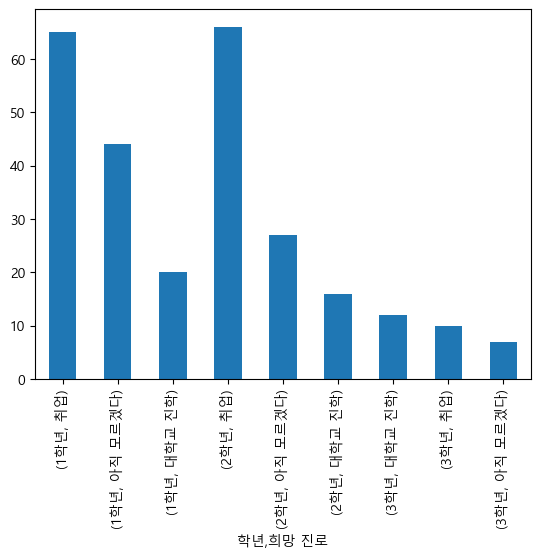

In [18]:
jsysoo.groupby("학년")["희망 진로"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='학과(전공),희망 진로'>

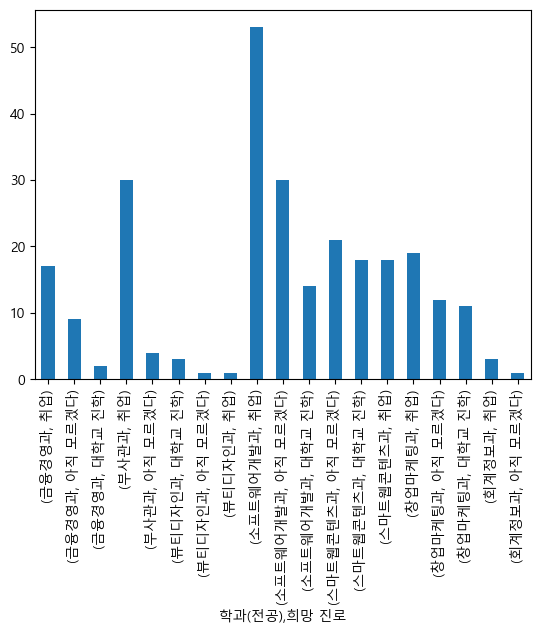

In [19]:
jsysoo.groupby("학과(전공)")["희망 진로"].value_counts().plot(kind="bar")

In [20]:
jsysoo.groupby("성별")["자격증 개수"].max()

성별
남자    9
여자    9
Name: 자격증 개수, dtype: object

In [21]:
jsysoo.groupby("자격증 개수")["성별"].value_counts()

자격증 개수  성별
1       남자    29
        여자    23
10      남자     1
10개 이상  남자     4
        여자     3
2       남자    41
        여자    27
3       남자    40
        여자    12
4       남자    40
        여자    10
5       남자    14
        여자     8
6       남자     4
        여자     2
7       남자     2
        여자     1
8       여자     3
        남자     1
9       남자     1
        여자     1
Name: 성별, dtype: int64

In [22]:
jsysoo.groupby("성별")["자격증 개수"].value_counts()

성별  자격증 개수
남자  2         41
    3         40
    4         40
    1         29
    5         14
    10개 이상     4
    6          4
    7          2
    10         1
    8          1
    9          1
여자  2         27
    1         23
    3         12
    4         10
    5          8
    10개 이상     3
    8          3
    6          2
    7          1
    9          1
Name: 자격증 개수, dtype: int64

<AxesSubplot:xlabel='성별,자격증 개수'>

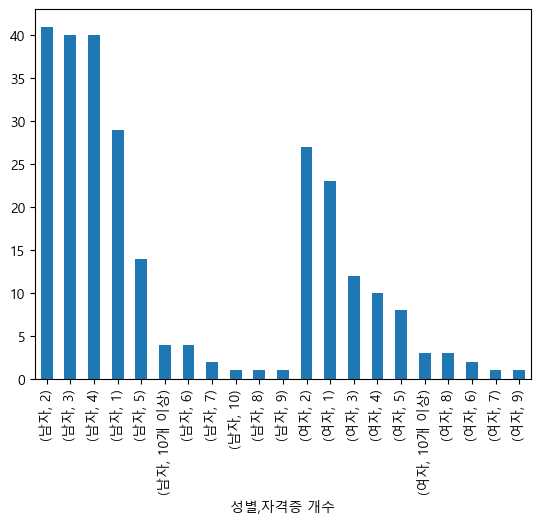

In [23]:
jsysoo.groupby("성별")["자격증 개수"].value_counts().plot(kind="bar")

<AxesSubplot:>

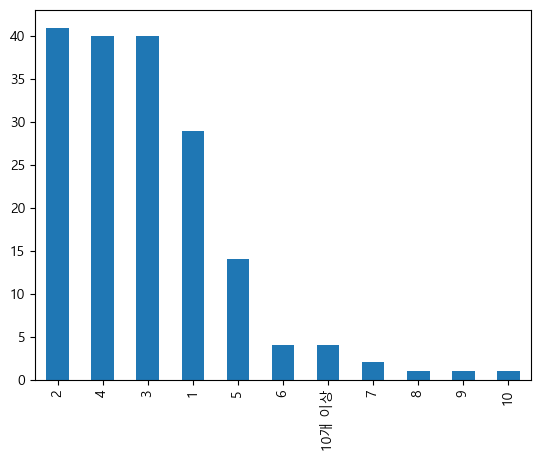

In [24]:
jsysoo[jsysoo["성별"]=="남자"]["자격증 개수"].value_counts().plot(kind="bar")

<AxesSubplot:>

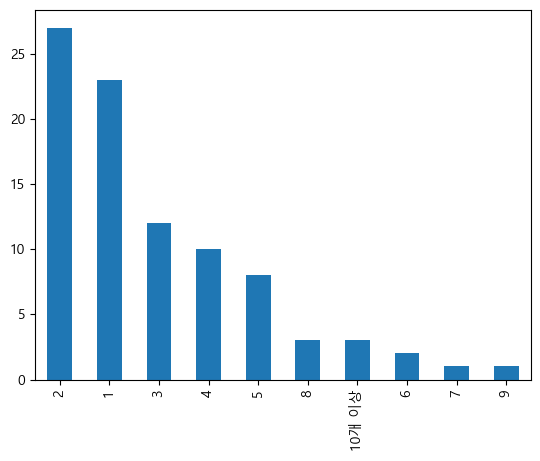

In [25]:
jsysoo[jsysoo["성별"]=="여자"]["자격증 개수"].value_counts().plot(kind="bar")

In [26]:
jsysoo.groupby("학년")["자격증 개수"].value_counts()

학년   자격증 개수
1학년  2         52
     1         43
     3         24
     4          6
     5          4
2학년  4         35
     3         27
     2         14
     5          9
     1          8
     10개 이상     5
     6          4
     8          3
     7          2
     10         1
     9          1
3학년  4          9
     5          9
     10개 이상     2
     2          2
     6          2
     1          1
     3          1
     7          1
     8          1
     9          1
Name: 자격증 개수, dtype: int64

<AxesSubplot:>

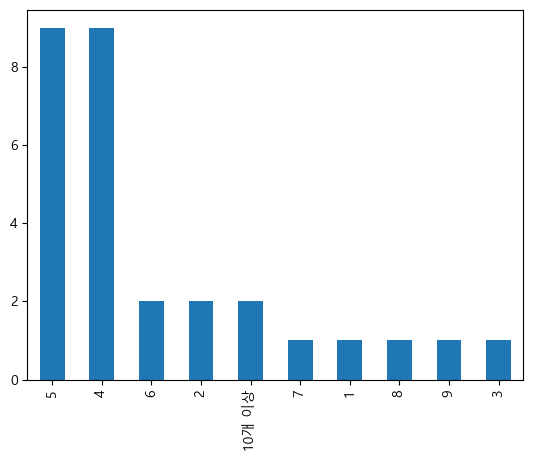

In [27]:
jsysoo[jsysoo["학년"]=="3학년"]["자격증 개수"].value_counts().plot(kind="bar")

# 10월 17일

Text(0, 0.5, '성적')

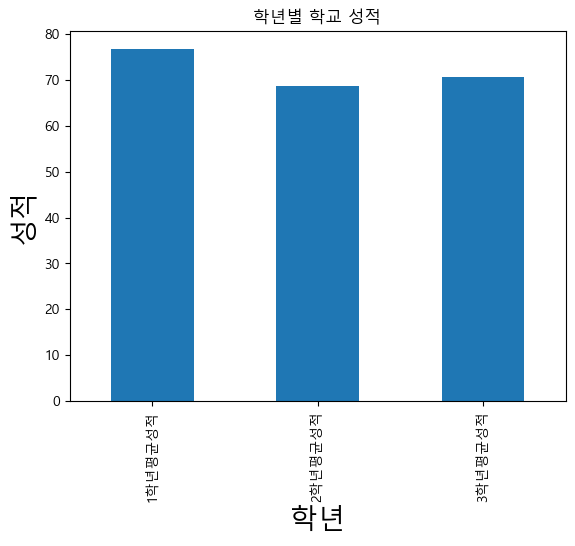

In [12]:
df[["1학년평균성적","2학년평균성적","3학년평균성적"]].mean().plot(kind='bar',
                                               title="학년별 학교 성적")
plt.xlabel("학년", fontsize=20)
plt.ylabel("성적",fontsize=20)

In [13]:
df["성별"].value_counts()

Male      156
Female     79
Name: 성별, dtype: int64

In [14]:
df["성별"].size

235

In [15]:
df = df.astype({"1학년평균성적":"int", "2학년평균성적":"int", "3학년평균성적":"int"})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   성별            235 non-null    object 
 1   전공            235 non-null    object 
 2   신장            235 non-null    float64
 3   몸무게           235 non-null    float64
 4   1학년평균성적       235 non-null    int32  
 5   2학년평균성적       235 non-null    int32  
 6   3학년평균성적       235 non-null    int32  
 7   취미            235 non-null    object 
 8   일평균학습시간       235 non-null    object 
 9   집중공부시간        235 non-null    object 
 10  기대연봉          235 non-null    int64  
 11  전공만족여부        235 non-null    object 
 12  전공관련취업선호도     235 non-null    object 
 13  일평균소셜미디어사용시간  235 non-null    object 
 14  통학시간          235 non-null    object 
 15  학업스트레스        235 non-null    object 
 16  교우관계스트레스      235 non-null    object 
 17  아르바이트여부       235 non-null    object 
 18  방과후수업여부       235 non-null    

In [17]:
df["성별"].value_counts()

Male      156
Female     79
Name: 성별, dtype: int64

In [106]:
male = df[df["성별"]=="Male"].sample(n=79) # random sampling


In [19]:
male

,성별,전공,신장,몸무게,1학년평균성적,2학년평균성적,3학년평균성적,취미,일평균학습시간,집중공부시간,기대연봉,전공만족여부,전공관련취업선호도,일평균소셜미디어사용시간,통학시간,학업스트레스,교우관계스트레스,아르바이트여부,방과후수업여부
73,Male,BCA,190.0,70.0,89,63,73,Sports,0 - 30 minute,Anytime,50000,Yes,50%,30 - 60 Minute,1 - 1.30 hour,나쁨,좋음,No,Yes
198,Male,B.com ISM,170.0,65.0,79,62,60,Cinema,1 - 2 Hour,Morning,25000,Yes,75%,1 - 30 Minute,0 - 30 minutes,좋음,좋음,No,Yes
59,Male,B.com Accounting and Finance,152.0,50.0,90,80,95,Sports,3 - 4 hour,Anytime,50000,Yes,75%,1 - 1.30 hour,30 - 60 minutes,나쁨,나쁨,Yes,Yes
184,Male,B.com ISM,150.0,48.0,46,48,60,Sports,1 - 2 Hour,Anytime,30000,Yes,50%,1 - 30 Minute,1 - 1.30 hour,나쁨,나쁨,No,No
107,Male,BCA,183.0,80.0,80,60,70,Video Games,0 - 30 minute,Anytime,10000,Yes,50%,1 - 30 Minute,0 - 30 minutes,좋음,나쁨,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Male,BCA,170.0,67.0,81,69,75,Cinema,30 - 60 minute,Anytime,25000,No,100%,1.30 - 2 hour,0 - 30 minutes,좋음,끔찍함,Yes,Yes
129,Male,BCA,170.0,65.0,82,55,75,Cinema,30 - 60 minute,Anytime,25000,Yes,50%,30 - 60 Minute,30 - 60 minutes,좋음,나쁨,No,No
38,Male,BCA,185.0,72.0,79,65,75,Video Games,30 - 60 minute,Morning,40000,Yes,75%,More than 2 hour,30 - 60 minutes,좋음,나쁨,No,Yes
137,Male,BCA,159.0,51.0,86,72,80,Reading books,More Than 4 hour,Morning,12500,No,75%,30 - 60 Minute,1 - 1.30 hour,좋음,나쁨,No,No


In [107]:
female = df[df["성별"]=="Female"]

In [108]:
new_df = pd.concat([male,female])

In [22]:
new_df.head(100)

,성별,전공,신장,몸무게,1학년평균성적,2학년평균성적,3학년평균성적,취미,일평균학습시간,집중공부시간,기대연봉,전공만족여부,전공관련취업선호도,일평균소셜미디어사용시간,통학시간,학업스트레스,교우관계스트레스,아르바이트여부,방과후수업여부
73,Male,BCA,190.0,70.0,89,63,73,Sports,0 - 30 minute,Anytime,50000,Yes,50%,30 - 60 Minute,1 - 1.30 hour,나쁨,좋음,No,Yes
198,Male,B.com ISM,170.0,65.0,79,62,60,Cinema,1 - 2 Hour,Morning,25000,Yes,75%,1 - 30 Minute,0 - 30 minutes,좋음,좋음,No,Yes
59,Male,B.com Accounting and Finance,152.0,50.0,90,80,95,Sports,3 - 4 hour,Anytime,50000,Yes,75%,1 - 1.30 hour,30 - 60 minutes,나쁨,나쁨,Yes,Yes
184,Male,B.com ISM,150.0,48.0,46,48,60,Sports,1 - 2 Hour,Anytime,30000,Yes,50%,1 - 30 Minute,1 - 1.30 hour,나쁨,나쁨,No,No
107,Male,BCA,183.0,80.0,80,60,70,Video Games,0 - 30 minute,Anytime,10000,Yes,50%,1 - 30 Minute,0 - 30 minutes,좋음,나쁨,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,Female,Commerce,159.0,67.0,98,80,85,Reading books,1 - 2 Hour,Anytime,15000,Yes,100%,1.30 - 2 hour,more than 3 hour,좋음,나쁨,No,Yes
54,Female,Commerce,180.0,43.0,86,78,85,Reading books,1 - 2 Hour,Anytime,10000,Yes,75%,1.30 - 2 hour,30 - 60 minutes,나쁨,좋음,No,Yes
56,Female,Commerce,156.0,52.0,82,70,80,Reading books,2 - 3 hour,Morning,15000,Yes,100%,1 - 30 Minute,0 - 30 minutes,너무 좋음,나쁨,Yes,Yes
57,Female,Commerce,167.0,62.0,80,60,60,Sports,1 - 2 Hour,Morning,18000,Yes,75%,1 - 1.30 hour,1 - 1.30 hour,좋음,좋음,No,Yes


In [23]:
new_df["1"]= new_df["1학년평균성적"].mean()
new_df["2"]= new_df["2학년평균성적"].mean()
new_df["3"]= new_df["3학년평균성적"].mean()

<AxesSubplot:ylabel='1학년평균성적'>

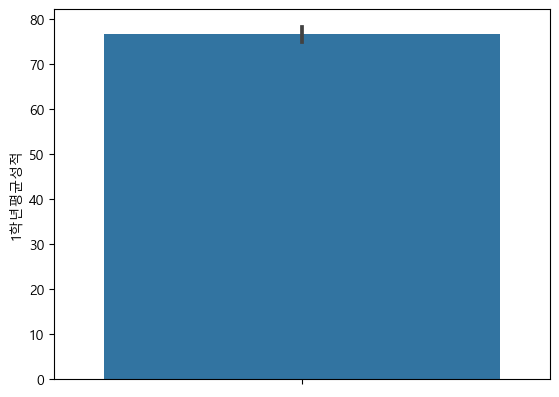

In [24]:
sns.barplot(data=df, y="1학년평균성적", hue="성별")

In [25]:
new_df["성적"]=100

In [26]:
new_df

,성별,전공,신장,몸무게,1학년평균성적,2학년평균성적,3학년평균성적,취미,일평균학습시간,집중공부시간,...,일평균소셜미디어사용시간,통학시간,학업스트레스,교우관계스트레스,아르바이트여부,방과후수업여부,1,2,3,성적
73,Male,BCA,190.0,70.0,89,63,73,Sports,0 - 30 minute,Anytime,...,30 - 60 Minute,1 - 1.30 hour,나쁨,좋음,No,Yes,77.689873,69.556962,72.968354,100
198,Male,B.com ISM,170.0,65.0,79,62,60,Cinema,1 - 2 Hour,Morning,...,1 - 30 Minute,0 - 30 minutes,좋음,좋음,No,Yes,77.689873,69.556962,72.968354,100
59,Male,B.com Accounting and Finance,152.0,50.0,90,80,95,Sports,3 - 4 hour,Anytime,...,1 - 1.30 hour,30 - 60 minutes,나쁨,나쁨,Yes,Yes,77.689873,69.556962,72.968354,100
184,Male,B.com ISM,150.0,48.0,46,48,60,Sports,1 - 2 Hour,Anytime,...,1 - 30 Minute,1 - 1.30 hour,나쁨,나쁨,No,No,77.689873,69.556962,72.968354,100
107,Male,BCA,183.0,80.0,80,60,70,Video Games,0 - 30 minute,Anytime,...,1 - 30 Minute,0 - 30 minutes,좋음,나쁨,No,Yes,77.689873,69.556962,72.968354,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Female,Commerce,167.0,65.0,93,85,90,Reading books,1 - 2 Hour,Night,...,30 - 60 Minute,30 - 60 minutes,좋음,좋음,No,Yes,77.689873,69.556962,72.968354,100
229,Female,B.com ISM,153.0,60.0,60,70,70,Sports,1 - 2 Hour,Anytime,...,1 - 1.30 hour,0 - 30 minutes,좋음,나쁨,No,No,77.689873,69.556962,72.968354,100
232,Female,BCA,139.0,33.0,90,75,70,Cinema,30 - 60 minute,Night,...,30 - 60 Minute,2.30 - 3 hour,나쁨,좋음,No,Yes,77.689873,69.556962,72.968354,100
233,Female,Commerce,153.0,58.0,85,74,75,Cinema,0 - 30 minute,Anytime,...,More than 2 hour,2.30 - 3 hour,끔찍함,좋음,No,Yes,77.689873,69.556962,72.968354,100


In [27]:
new_df=pd.melt(new_df,id_vars=["성별"],value_vars=["1학년평균성적","2학년평균성적","3학년평균성적"])

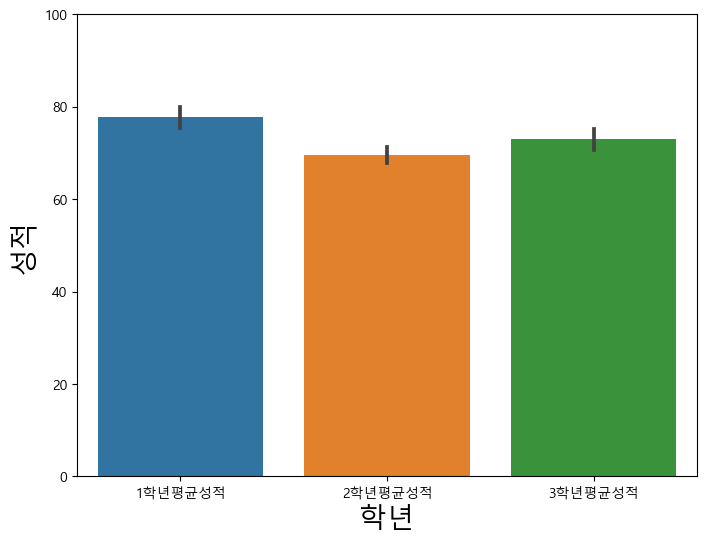

In [28]:
plt.figure(figsize=(8,6))

sns.barplot(data=new_df,x="variable",y="value",dodge=True)
plt.rc("font", family="Malgun Gothic")
plt.yticks([0,20,40,60,80,100])
plt.ylabel('성적',fontsize = 20)
plt.xlabel('학년',fontsize = 20)
plt.show()

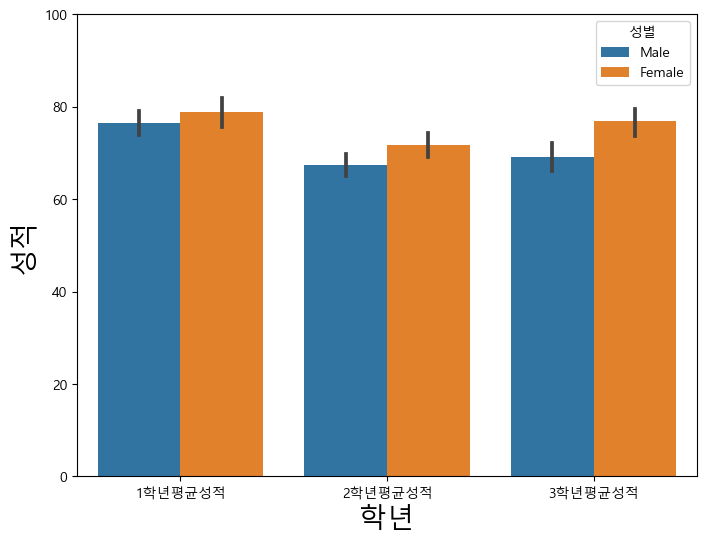

In [29]:
plt.figure(figsize=(8,6))

sns.barplot(data=new_df,x="variable",y="value",hue="성별",dodge=True)
plt.rc("font", family="Malgun Gothic")
plt.yticks([0,20,40,60,80,100])
plt.ylabel('성적',fontsize = 20)
plt.xlabel('학년',fontsize = 20)
plt.show()

In [30]:
new_df

,성별,variable,value
0,Male,1학년평균성적,89
1,Male,1학년평균성적,79
2,Male,1학년평균성적,90
3,Male,1학년평균성적,46
4,Male,1학년평균성적,80
...,...,...,...
469,Female,3학년평균성적,90
470,Female,3학년평균성적,70
471,Female,3학년평균성적,70
472,Female,3학년평균성적,75


In [31]:
jsysoo["성별"].value_counts()

남자    190
여자     97
Name: 성별, dtype: int64

In [78]:
male = jsysoo[jsysoo["성별"]=="남자"].sample(n=97)
female = jsysoo[jsysoo["성별"]=="여자"]

In [79]:
new_jsysoo = pd.concat([male,female])

In [68]:
new_jsysoo

,타임스탬프,학년,성별,학과(전공),취미,평균 공부 시간,공부하는 시간,자격증 개수,출석,평균 수면 시간,...,희망 연봉,학과 만족 O/X,취업 선호도,소셜 미디어 사용시간,통학 시간,학업 스트레스,교우관계,알바 유무,방과후 유무,방과후 만족도
119,2023. 10. 12 오후 3:49:47,1학년,남자,소프트웨어개발과,게임,30분-1시간,방과후(저녁),2,절대 안빠지죠,6시간 이상 자요,...,2000.0,O,10,0-30분,1시간-2시간,1,1,X,O(아래 질문에 답변해주세요!),10.0
5,2023. 10. 12 오후 12:23:29,3학년,남자,소프트웨어개발과,게임,30분-1시간,기타,5,절대 안빠지죠,2~4시간 자요,...,NaN,X,5,30-1시간,10-30분,3,3,X,X,5.0
184,2023. 10. 12 오후 5:18:46,2학년,남자,금융경영과,게임,30분-1시간,밤,7,절대 안빠지죠,6시간 이상 자요,...,3000.0,O,10,0-30분,30-1시간,2,1,O,X,NaN
194,2023. 10. 12 오후 6:11:46,2학년,남자,소프트웨어개발과,음악,0-30분,방과후(저녁),4,절대 안빠지죠,4~6시간 자요,...,3000.0,O,5,1시간-2시간,30-1시간,2,1,X,O(아래 질문에 답변해주세요!),5.0
69,2023. 10. 12 오후 2:05:00,2학년,남자,소프트웨어개발과,게임,2시간-3시간 이상,밤,4,절대 안빠지죠,4~6시간 자요,...,NaN,O,7,1시간-2시간,30-1시간,3,1,X,O(아래 질문에 답변해주세요!),7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2023. 10. 17 오후 3:08:40,2학년,여자,스마트웹콘텐츠과,운동,1시간-2시간,방과후(저녁),4,절대 안빠지죠,2~4시간 자요,...,2000.0,O,8,1시간-2시간,1시간-2시간,4,1,O,O(아래 질문에 답변해주세요!),9.0
274,2023. 10. 17 오후 3:08:43,2학년,여자,스마트웹콘텐츠과,영상시청,30분-1시간,밤,4,한달에 한두번 빠져요,4~6시간 자요,...,8000.0,O,7,2시간-3시간 이상,30-1시간,3,1,X,O(아래 질문에 답변해주세요!),5.0
277,2023. 10. 17 오후 3:13:28,2학년,여자,스마트웹콘텐츠과,운동,0-30분,밤,4,절대 안빠지죠,2~4시간 자요,...,NaN,X,5,2시간-3시간 이상,10-30분,3,2,X,X,9.0
281,2023. 10. 17 오후 3:23:18,2학년,여자,스마트웹콘텐츠과,게임,1시간-2시간,밤,4,한달에 한두번 빠져요,6시간 이상 자요,...,5000.0,O,3,1시간-2시간,1시간-2시간,2,2,X,X,3.0


In [71]:
new_jsysoo=pd.melt(new_jsysoo,id_vars=["학과(전공)"],value_vars=["희망 연봉"])

In [46]:
new_jsysoo

,학과(전공),variable,value
0,스마트웹콘텐츠과,희망 연봉,2000.0
1,소프트웨어개발과,희망 연봉,4000.0
2,소프트웨어개발과,희망 연봉,3000.0
3,스마트웹콘텐츠과,희망 연봉,2000.0
4,창업마케팅과,희망 연봉,NaN
...,...,...,...
182,스마트웹콘텐츠과,희망 연봉,2000.0
183,스마트웹콘텐츠과,희망 연봉,8000.0
184,스마트웹콘텐츠과,희망 연봉,NaN
185,스마트웹콘텐츠과,희망 연봉,5000.0


Text(0, 0.5, '연봉')

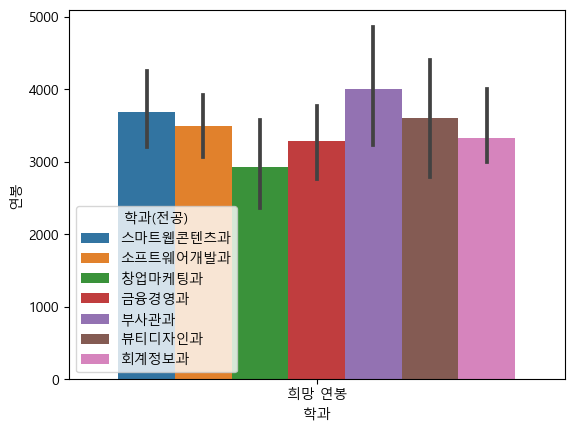

In [50]:
sns.barplot(data=new_jsysoo, x="variable", y="value",hue="학과(전공)", dodge=True)
plt.xlabel("학과")
plt.ylabel("연봉")

(1.0, 10.0)

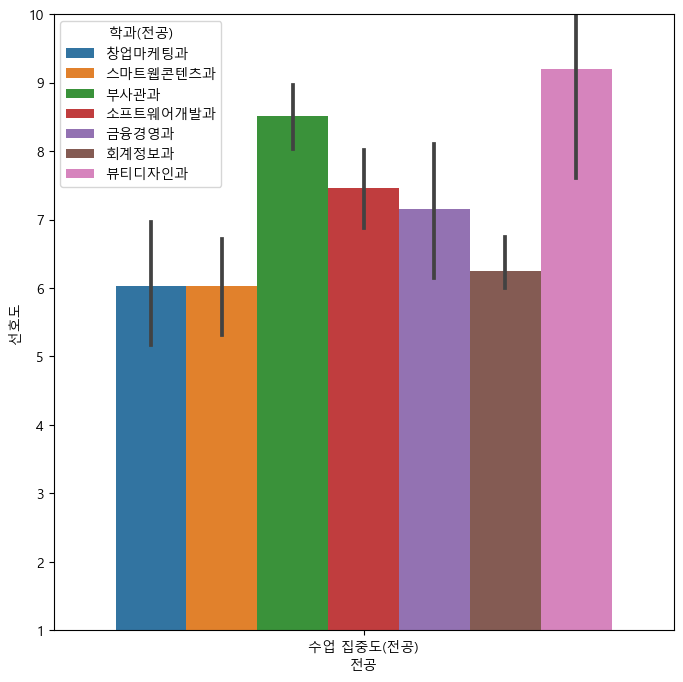

In [38]:
plt.figure(figsize=(8,8))
sns.barplot(data=new_jsysoo, x="variable", y="value",hue="학과(전공)", dodge=True)
plt.xlabel("전공")
plt.ylabel("선호도")
plt.ylim(1,10)

(1.0, 4.0)

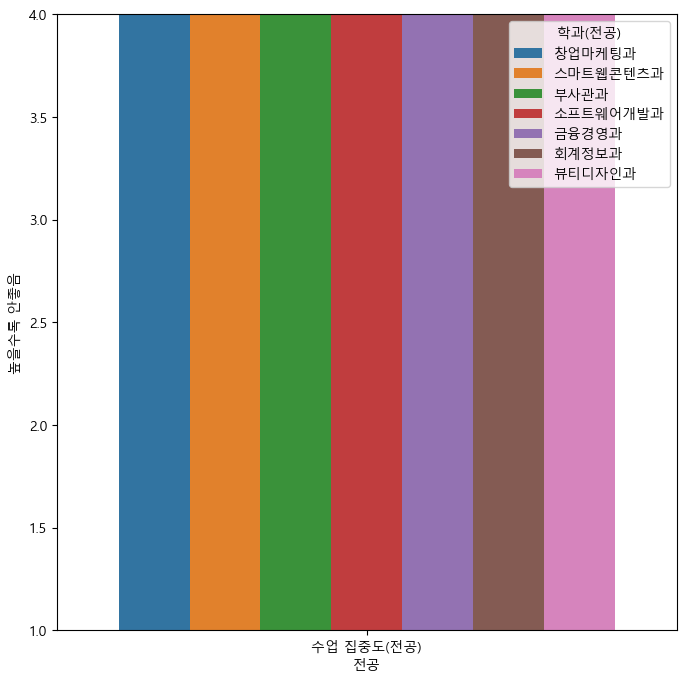

In [39]:
plt.figure(figsize=(8,8))
sns.barplot(data=new_jsysoo, x="variable", y="value",hue="학과(전공)", dodge=True)
plt.xlabel("전공")
plt.ylabel("높을수록 안좋음")
plt.ylim(1,4)

In [40]:
jsysoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   타임스탬프        287 non-null    object 
 1   학년           287 non-null    object 
 2   성별           287 non-null    object 
 3   학과(전공)       287 non-null    object 
 4   취미           287 non-null    object 
 5   평균 공부 시간     287 non-null    object 
 6   공부하는 시간      287 non-null    object 
 7   자격증 개수       287 non-null    object 
 8   출석           287 non-null    object 
 9   평균 수면 시간     287 non-null    object 
 10  희망 진로        287 non-null    object 
 11  수업 집중도       287 non-null    int64  
 12  수업 집중도(전공)   287 non-null    int64  
 13  희망 연봉        216 non-null    float64
 14  학과 만족 O/X    287 non-null    object 
 15  취업 선호도       287 non-null    int64  
 16  소셜 미디어 사용시간  287 non-null    object 
 17  통학 시간        287 non-null    object 
 18  학업 스트레스      287 non-null    int64  
 19  교우관계    

(1.0, 10.0)

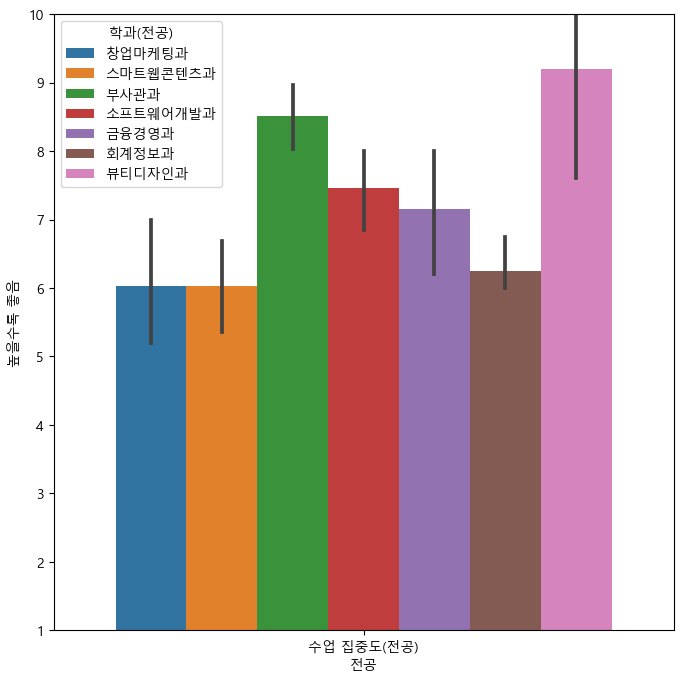

In [41]:
plt.figure(figsize=(8,8))
sns.barplot(data=new_jsysoo, x="variable", y="value",hue="학과(전공)", dodge=True)
plt.xlabel("전공")
plt.ylabel("높을수록 좋음")
plt.ylim(1,10)

# 10월 18일

##  ___sns.boxplot___

위에 sns.barplot보다 데이터의 밀집도를 볼 수 있다.

가운데선은 데이터의 평균을 의미하고,
바깥선은 데이터의 범위를 의미한다.

이에 따라 1학년의 평균 성적은 범위가 비슷하고
3학년의 평균 성적은 3학년 남자가 범위가 매우 넓다는 것을 알 수 있다.

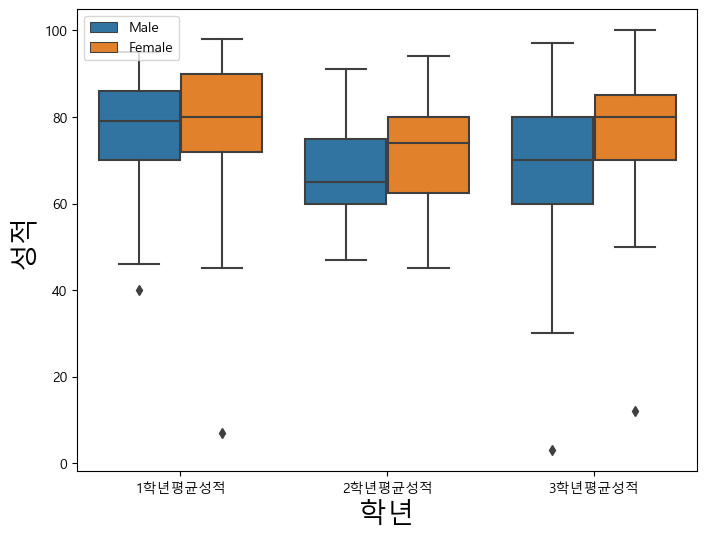

In [57]:
plt.figure(figsize=(8,6))
sns.boxplot(data=new_df, x="variable", y= "value", hue="성별", dodge=True)
plt.rc("font", family="Malgun Gothic")
plt.yticks([0,20,40,60,80,100])
plt.ylabel('성적',fontsize = 20)
plt.xlabel('학년',fontsize = 20)
plt.legend(loc=2)
plt.show()

**학과의 따른 희망 연봉 평균**

Text(0, 0.5, '연봉')

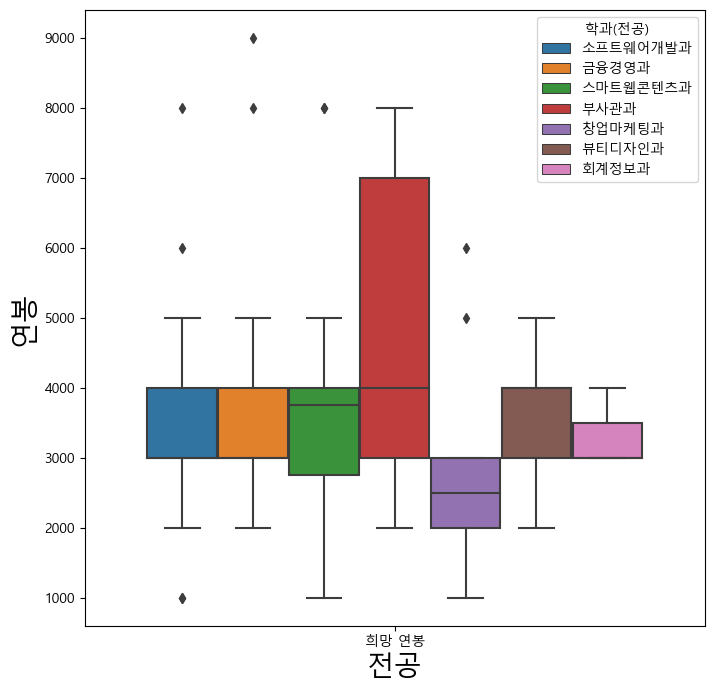

In [72]:
plt.figure(figsize=(8,8))
sns.boxplot(data=new_jsysoo, x="variable", y="value",hue="학과(전공)", dodge=True)
plt.xlabel("전공",fontsize = 20)
plt.ylabel("연봉",fontsize = 20)

In [69]:
new_jsysoo["성별"].value_counts()

남자    97
여자    97
Name: 성별, dtype: int64

In [92]:
new_jsysoo = pd.concat([male,female])
new_jsysoo=pd.melt(new_jsysoo,id_vars=["알바 유무"],value_vars=["희망 연봉"])

**자격증 개수의 따른 희망 연봉 평균**

Text(0, 0.5, '희망 연봉')

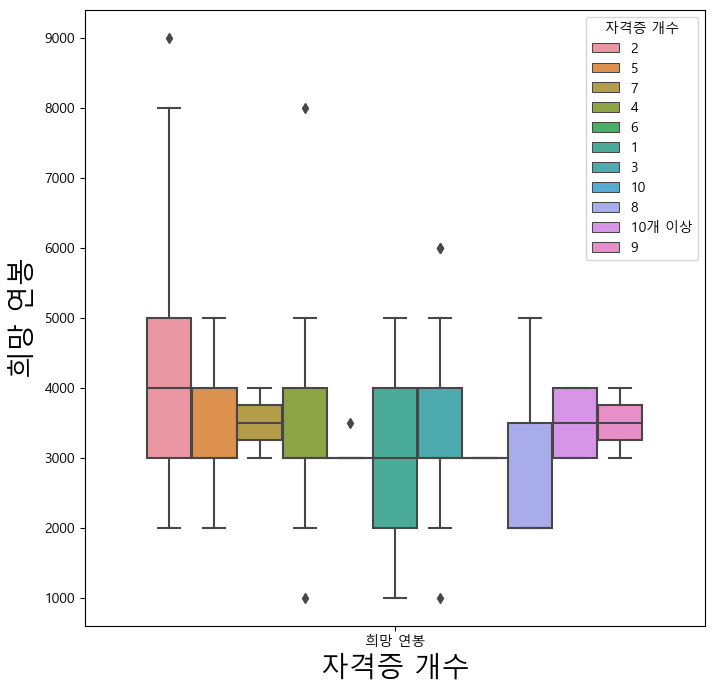

In [77]:
plt.figure(figsize=(8,8))
sns.boxplot(data=new_jsysoo, x="variable", y="value",hue="자격증 개수", dodge=True)
plt.xlabel("자격증 개수",fontsize = 20)
plt.ylabel("희망 연봉",fontsize = 20)

**성별의 따른 희망 연봉 평균**

Text(0, 0.5, '희망 연봉')

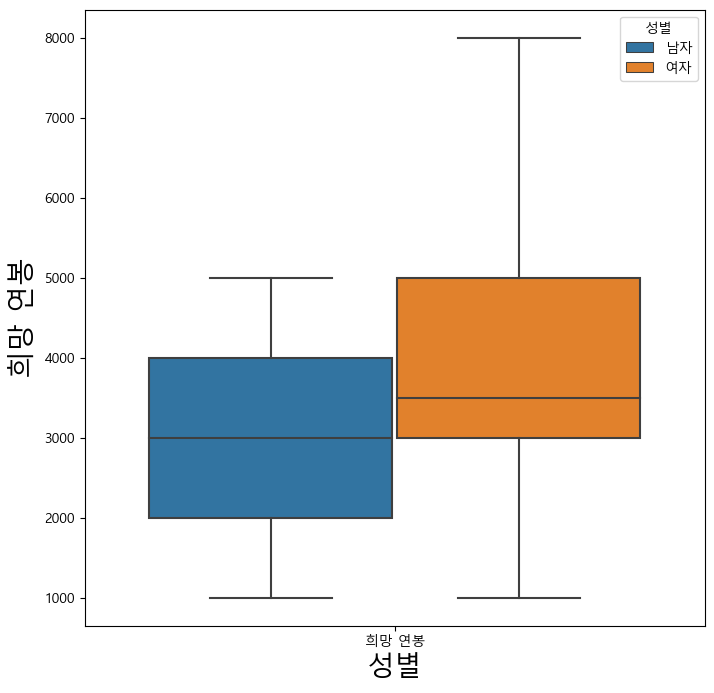

In [82]:
plt.figure(figsize=(8,8))
sns.boxplot(data=new_jsysoo, x="variable", y="value",hue="성별", dodge=True)
plt.xlabel("성별",fontsize = 20)
plt.ylabel("희망 연봉",fontsize = 20)

**학년별 희망 연봉 평균**

(0.0, 10000.0)

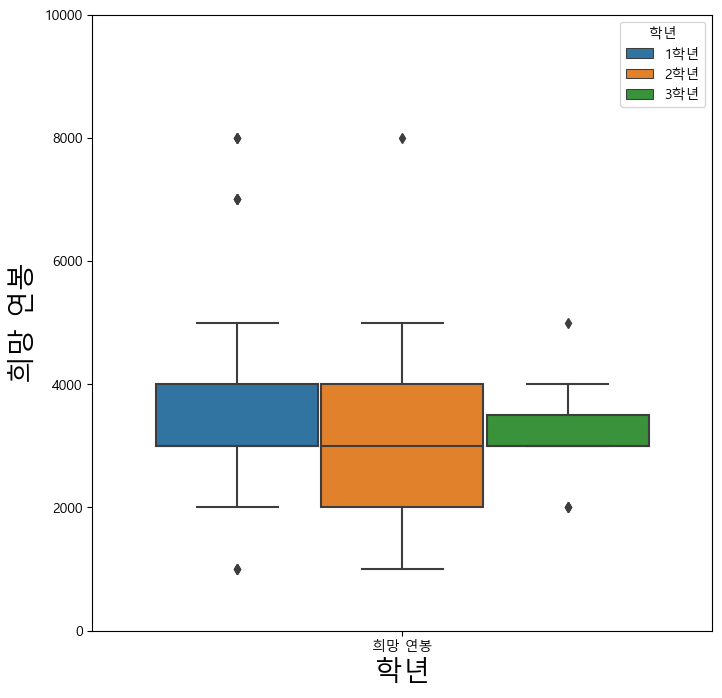

In [88]:
plt.figure(figsize=(8,8))
sns.boxplot(data=new_jsysoo, x="variable", y="value",hue="학년", dodge=True)
plt.xlabel("학년",fontsize = 20)
plt.ylabel("희망 연봉",fontsize = 20)
plt.ylim(0,10000)

**알바 유무의 따른 희망 연봉**

Text(0, 0.5, '희망 연봉')

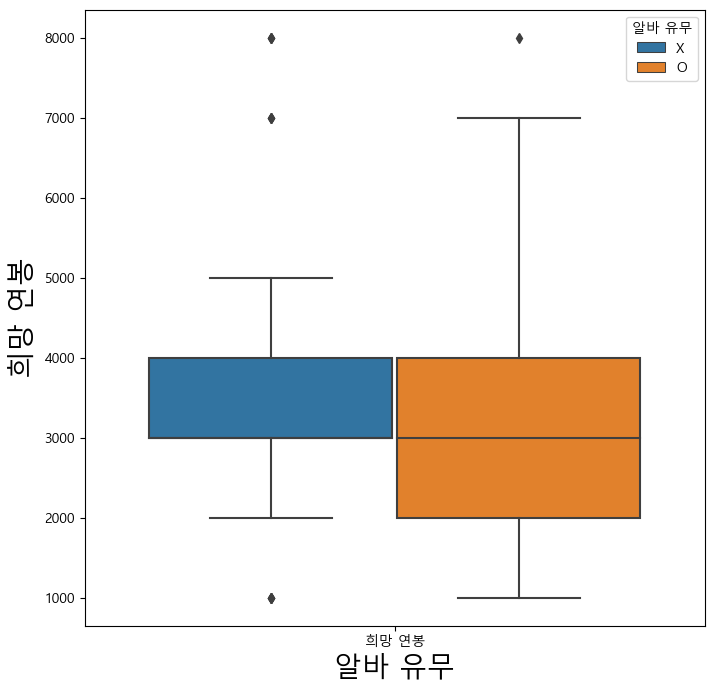

In [93]:
plt.figure(figsize=(8,8))
sns.boxplot(data=new_jsysoo, x="variable", y="value",hue="알바 유무", dodge=True)
plt.xlabel("알바 유무",fontsize = 20)
plt.ylabel("희망 연봉",fontsize = 20)

In [98]:
new_jsysoo = pd.concat([male,female])
new_jsysoo=pd.melt(new_jsysoo,id_vars=["학과(전공)"],value_vars=["수업 집중도(전공)"])

**학과의 따른 학업 스트레스**

Text(0, 0.5, '스트레스')

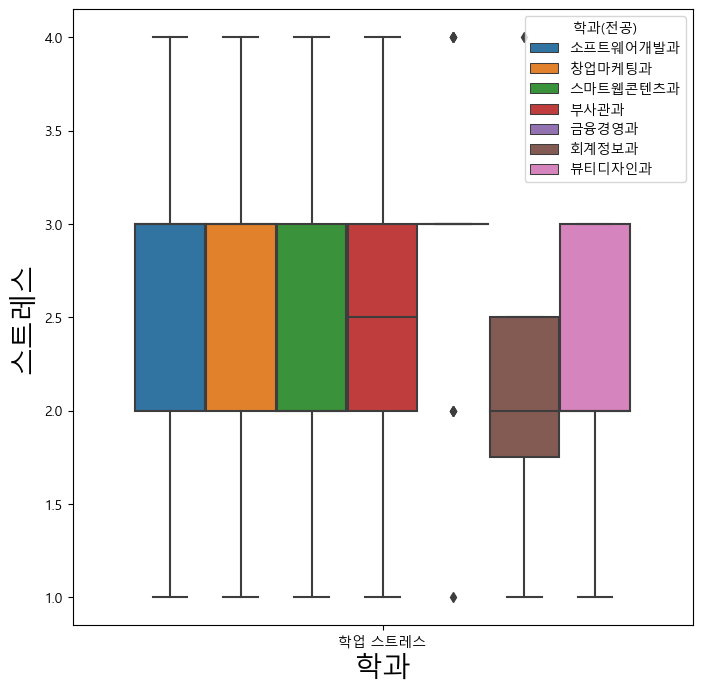

In [95]:
plt.figure(figsize=(8,8))
sns.boxplot(data=new_jsysoo, x="variable", y="value",hue="학과(전공)", dodge=True)
plt.xlabel("학과",fontsize = 20)
plt.ylabel("스트레스",fontsize = 20)

**학고의 따른 수업 집중도**

Text(0, 0.5, '수업 집중도')

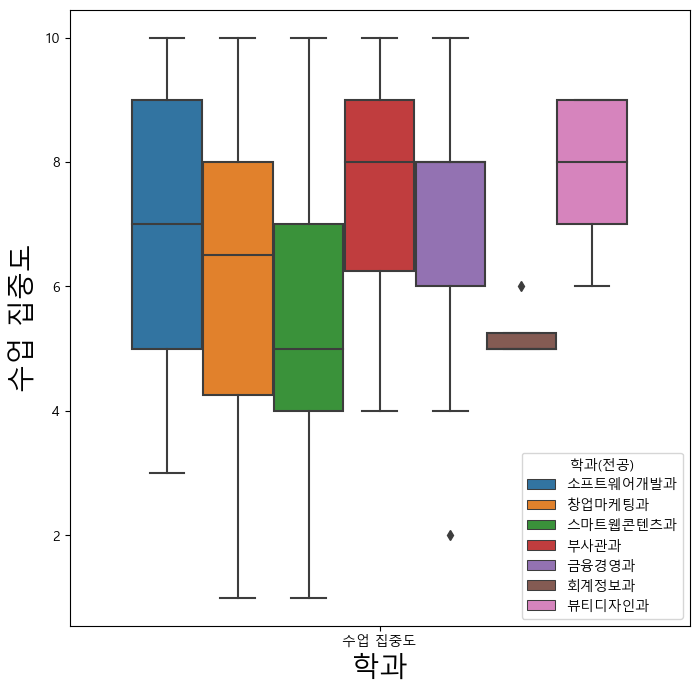

In [97]:
plt.figure(figsize=(8,8))
sns.boxplot(data=new_jsysoo, x="variable", y="value",hue="학과(전공)", dodge=True)
plt.xlabel("학과",fontsize = 20)
plt.ylabel("수업 집중도",fontsize = 20)

**학과의 따른 전공 집중도**

Text(0, 0.5, '전공 수업 집중도')

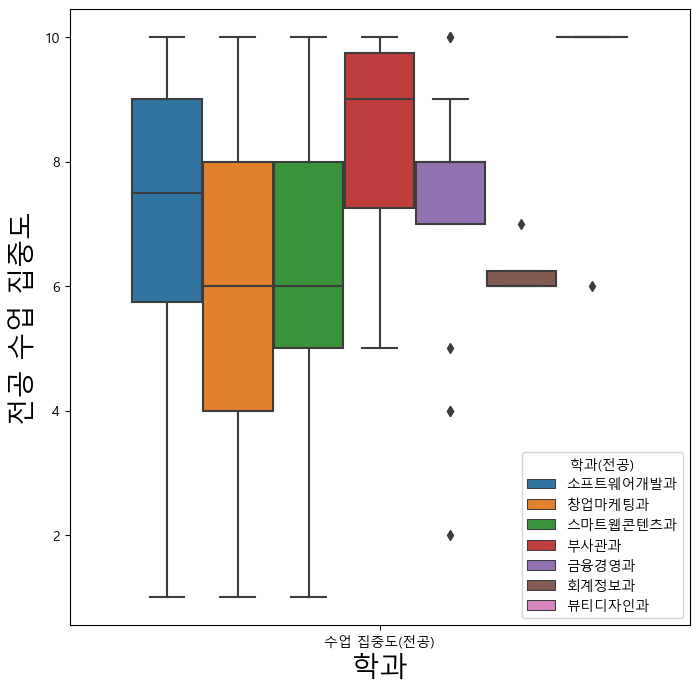

In [99]:
plt.figure(figsize=(8,8))
sns.boxplot(data=new_jsysoo, x="variable", y="value",hue="학과(전공)", dodge=True)
plt.xlabel("학과",fontsize = 20)
plt.ylabel("전공 수업 집중도",fontsize = 20)

성별의 따른 일평균학습시간 그래프 만들기

In [109]:
new_df=pd.melt(new_df,id_vars=["성별"],value_vars=["일평균학습시간"])

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0 - 30 minute'),
  Text(1, 0, '30 - 60 minute'),
  Text(2, 0, '1 - 2 Hour'),
  Text(3, 0, '2 - 3 hour'),
  Text(4, 0, '3 - 4 hour'),
  Text(5, 0, 'More Than 4 hour')])

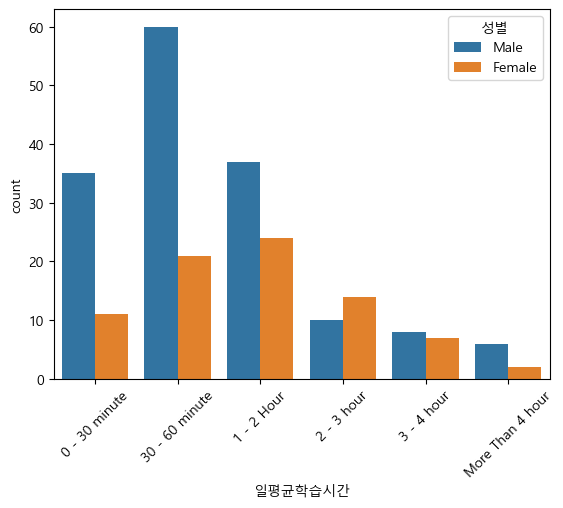

In [125]:
# plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="일평균학습시간", hue="성별")
plt.xticks(rotation=45, fontsize=10)

<AxesSubplot:xlabel='일평균학습시간', ylabel='Count'>

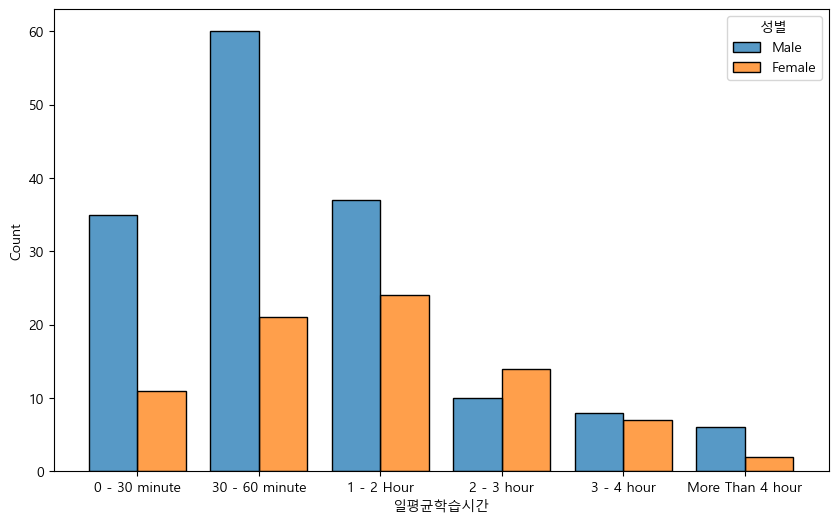

In [128]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="일평균학습시간", hue="성별",multiple="dodge", shrink=.8)

In [129]:
df.index

RangeIndex(start=0, stop=235, step=1)

성별의 따른 일평균학습시간 데이터 꾸미기

In [142]:
df.groupby("성별")["일평균학습시간"].value_counts().sort_index()

성별      일평균학습시간         
Female  0 - 30 minute       11
        1 - 2 Hour          24
        2 - 3 hour          14
        3 - 4 hour           7
        30 - 60 minute      21
        More Than 4 hour     2
Male    0 - 30 minute       35
        1 - 2 Hour          37
        2 - 3 hour          10
        3 - 4 hour           8
        30 - 60 minute      60
        More Than 4 hour     6
Name: 일평균학습시간, dtype: int64

In [146]:
STMale = male["일평균학습시간"]
STFMale = female["일평균학습시간"]

STMale = pd.DataFrame(STMale.value_counts())
STMale['index'] = STMale.index
STMale.index=[x for x in range(0,6)]

STFMale = pd.DataFrame(STFMale.value_counts())
STFMale['index'] = STFMale.index
STFMale.index=[x for x in range(0,6)]

print(STMale)
print(STFMale)

   일평균학습시간             index
0       26    30 - 60 minute
1       23     0 - 30 minute
2       19        1 - 2 Hour
3        4        2 - 3 hour
4        4        3 - 4 hour
5        3  More Than 4 hour
   일평균학습시간             index
0       24        1 - 2 Hour
1       21    30 - 60 minute
2       14        2 - 3 hour
3       11     0 - 30 minute
4        7        3 - 4 hour
5        2  More Than 4 hour


In [184]:
fig = make_subplots(rows=1 , cols=2, specs=[[{"type":"domain"},{"type":"domain"}]])

fig.add_trace(go.Pie(labels=STMale["index"],
                    values=STMale["일평균학습시간"]),1,1)
fig.add_trace(go.Pie(labels=STFMale["index"],
                    values=STFMale["일평균학습시간"]),1,2)
fig.update_traces(hole=.4, hoverinfo="label+percent")
fig.update_layout(
    title_text="Male vs Female",
    annotations =  [dict(text='Male', x=0.15, y=0.5, font_size=20, showarrow=False),
                    dict(text="Female", x=0.85, y=0.5, font_size=15, showarrow=False)]
    # annotations = 주석
)
fig.show()